In [4]:
import sys, importlib
sys.path.append("..")  # project root
import scripts.data_prep as dp
importlib.reload(dp)

import scanpy as sc

IN_PATH = "../data/processed/GSE169569_GSE169570_neutrophils_bowel_disease-25.07.0.h5ad"
adata = sc.read_h5ad(IN_PATH)


# # --- Input files and parameters ---
# DATA_ROOT = "../data/processed"
# OUT_DIR   = "../data/processed/scvi_prepared"
# TOTALS_COL = "total_counts_after_preprocessing"

# # List of files to process
# files = [
#     "dataset1.h5ad",
#     "dataset2.h5ad",
#     "dataset3.h5ad",
# ]

In [5]:
dp.print_adata_summary(adata)

Shape: (447, 51777)
X dtype: float64
Example values from X: [0.         0.         0.65439486 0.         0.         0.
 0.65439486 0.81989226 0.         6.50348223]
Layers: []

.obs columns: ['total_counts_before_preprocessing', 'total_counts_after_trimming', 'total_counts_after_preprocessing', 'total_count_ratio__after_to_before', 'QC_mapping_ratio_bacterial', 'QC_mapping_ratio_viral', 'QC_mapping_ratio_miRNA', 'QC_mapping_ratio_sncRNA', 'Bases', 'Bytes', 'Avg_spot_length', 'BioProject', 'BioSample', 'Experiment', 'GEO_Accession_exp', 'SRA_study', 'Sample_name', 'Consent', 'Center_name', 'Organism', 'source_name', 'cohort', 'sex', 'age', 'treatment', 'diagnosis', 'Assay_type', 'Sequencer', 'Sample_type', 'Lab_library_layout', 'Lab_library_selection', 'Lab_library_source', 'Lab_RNA_extraction_protocol', 'Lab_Blocking_State', 'Lab_library_preparation_kit', 'Release_date', 'create_date', 'version', 'total_count']

.obs sample (first 5 rows):
             total_counts_before_preprocessing

In [6]:
# Prepare scVI datasets (raw/hvg/top-mean) from X ≈ log2(1+CPM)
OUT_DIR = "../data/processed/scvi_prepared"
res = dp.prepare_scvi_datasets(
    adata,
    out_dir=OUT_DIR,
    n_hvg=4000,
    n_mean=4000,
    totals_col="total_counts_after_preprocessing",
    batch_key="cohort",
    min_counts_filter=10,
    prefix="GSE169569",
    save=True,
)

print("\n[QC]", res["qc"])
print("[SAVE] RAW :", res["raw"]["path"])
print("[SAVE] HVG :", res["hvg"]["path"])
print("[SAVE] Mean:", res["topmean"]["path"])

# 3) Quick peek of saved datasets
adata_raw  = res["raw"]["adata"]
adata_hvg  = res["hvg"]["adata"]
adata_mean = res["topmean"]["adata"]

dp.show_sample(adata_raw,  "RAW")
dp.show_sample(adata_hvg,  "HVG")
dp.show_sample(adata_mean, "Top-Mean")


Zero fraction (counts): 0.6622658890935611
Row-sum corr vs totals: 0.9999999980500865
Median abs diff: 314.0
Min/Max counts: 0 3857841

[QC] {'zero_fraction_counts': 0.6622658890935611, 'row_sum_corr_vs_totals': 0.9999999980500865, 'median_abs_diff': 314.0, 'min_counts': 0, 'max_counts': 3857841}
[SAVE] RAW : ../data/processed/scvi_prepared/GSE169569_raw_counts.h5ad
[SAVE] HVG : ../data/processed/scvi_prepared/GSE169569_hvg4000.h5ad
[SAVE] Mean: ../data/processed/scvi_prepared/GSE169569_topmean4000.h5ad

RAW shape: (447, 51777)
--- X sample (first n_cells x n_genes) ---
[[0 0 3 0 0]
 [0 0 1 0 0]
 [1 0 3 0 0]
 [0 0 1 0 0]
 [0 0 3 0 0]]
--- obs sample ---
             total_counts_before_preprocessing  total_counts_after_trimming  \
smpID                                                                         
SRR14062693                            6288582                      5833092   
SRR14062694                            8410144                      7842618   
SRR14062695           

In [7]:
# # --- Process each dataset ---
# for fname in files:
#     in_path = Path(DATA_ROOT) / fname
#     prefix = in_path.stem  # e.g., dataset1
#     print(f"\n=== Processing: {fname} ===")
    
#     # 1) Load
#     adata = sc.read_h5ad(in_path)
#     dp.print_adata_summary(adata, n_preview=3)
    
#     # 2) Prepare scVI datasets
#     res = dp.prepare_scvi_datasets(
#         adata,
#         out_dir=OUT_DIR,
#         n_hvg=4000,
#         n_mean=4000,
#         totals_col=TOTALS_COL,
#         batch_key="cohort",
#         min_counts_filter=10,
#         prefix=prefix,
#         save=True,
#     )

#     print("[QC]", res["qc"])
#     print("[SAVE] RAW :", res["raw"]["path"])
#     print("[SAVE] HVG :", res["hvg"]["path"])
#     print("[SAVE] Mean:", res["topmean"]["path"])

Batch candidate summary:


,column,n_levels,min_count_per_level,max_count_per_level,median_count_per_level
1,Center_name,1,447,447,447.0
2,Sequencer,1,447,447,447.0
3,Lab_library_preparation_kit,1,447,447,447.0
4,Assay_type,1,447,447,447.0
5,Sample_type,1,447,447,447.0
6,Lab_library_layout,1,447,447,447.0
0,cohort,2,205,242,223.5
8,SRA_study,2,205,242,223.5
7,Experiment,447,1,1,1.0


Kruskal–Wallis table (QC differences across candidate levels):


,column,qc_metric,kruskal_stat,p_value,neglog10_p
54,cohort,QC_mapping_ratio_miRNA,267.491662,3.995765e-60,59.398400
62,SRA_study,QC_mapping_ratio_miRNA,267.491662,3.995765e-60,59.398400
60,SRA_study,QC_mapping_ratio_bacterial,144.589399,2.640763e-33,32.578271
52,cohort,QC_mapping_ratio_bacterial,144.589399,2.640763e-33,32.578271
50,cohort,total_counts_before_preprocessing,7.331773,6.774621e-03,2.169115
58,SRA_study,total_counts_before_preprocessing,7.331773,6.774621e-03,2.169115
57,SRA_study,total_counts_after_trimming,2.831424,9.243634e-02,1.034157
49,cohort,total_counts_after_trimming,2.831424,9.243634e-02,1.034157
56,SRA_study,total_counts_after_preprocessing,0.371955,5.419406e-01,0.266048
48,cohort,total_counts_after_preprocessing,0.371955,5.419406e-01,0.266048


Top candidates to visually inspect: ['SRA_study', 'cohort', 'Assay_type']


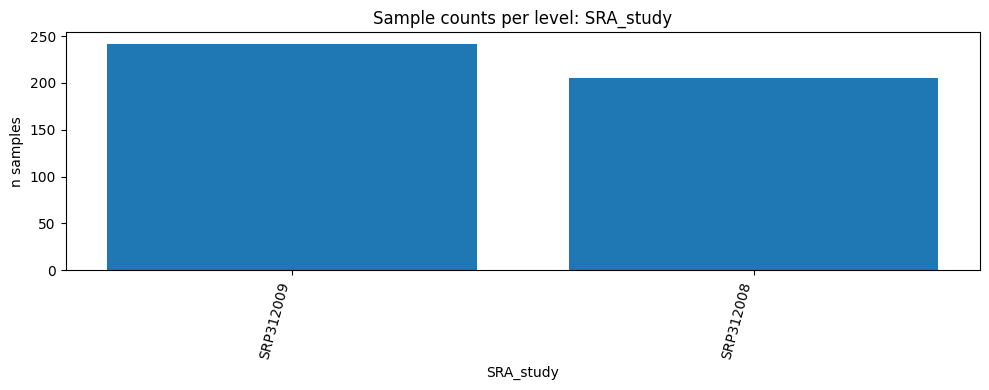

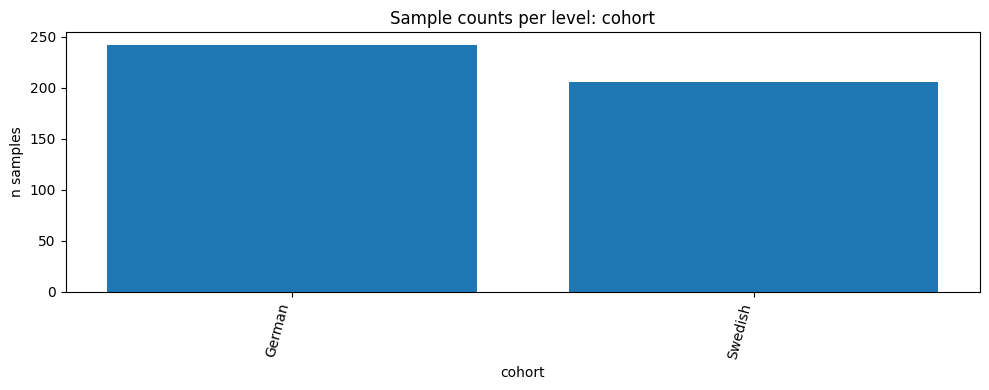

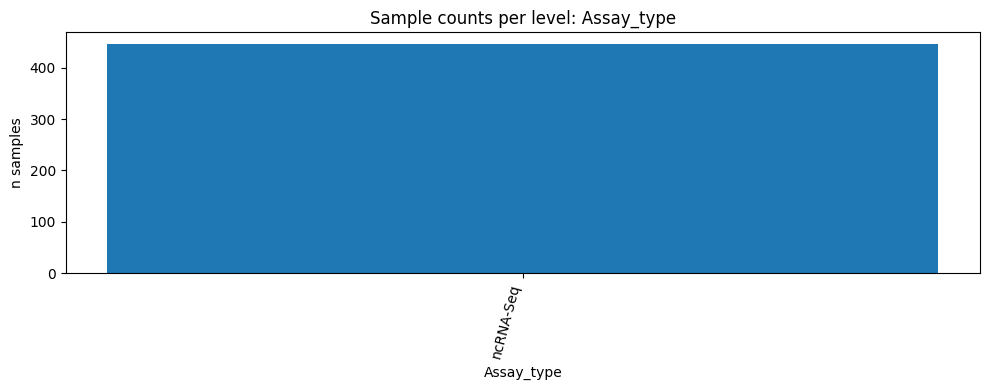

/mnt/data/thesis_project/notebooks/ipykernel_615122/3460499819.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


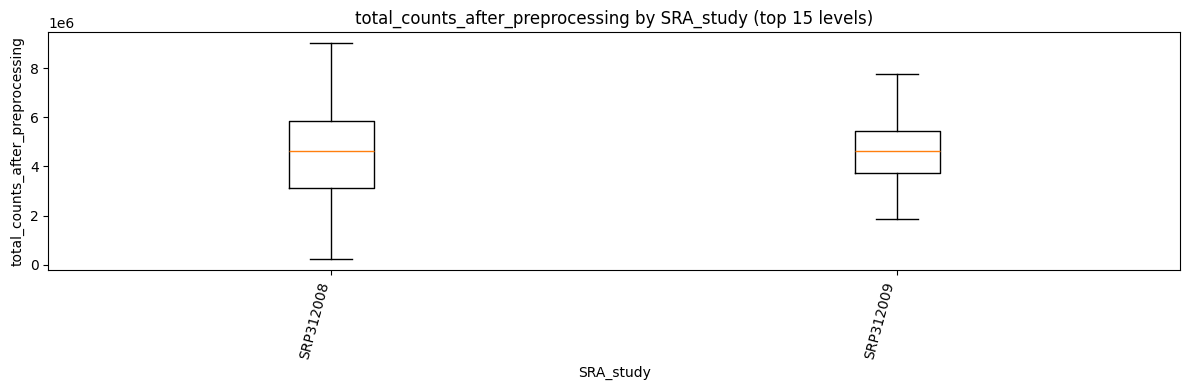

/mnt/data/thesis_project/notebooks/ipykernel_615122/3460499819.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


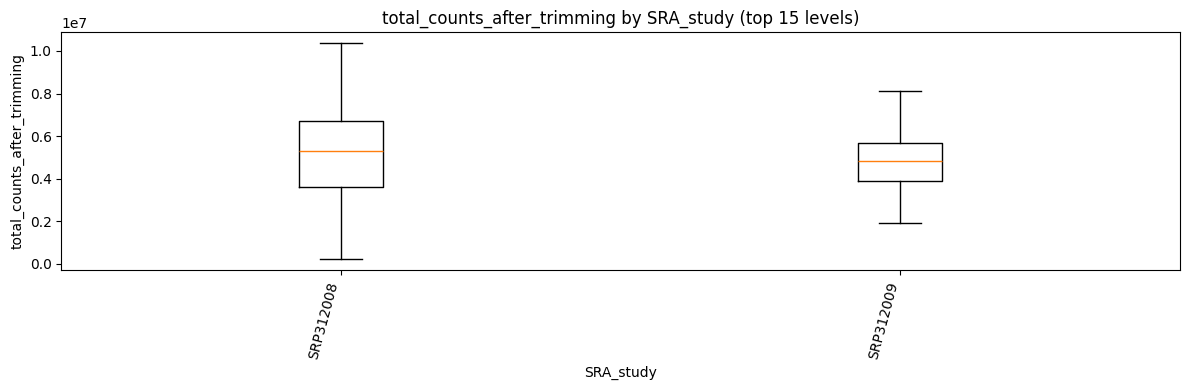

/mnt/data/thesis_project/notebooks/ipykernel_615122/3460499819.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


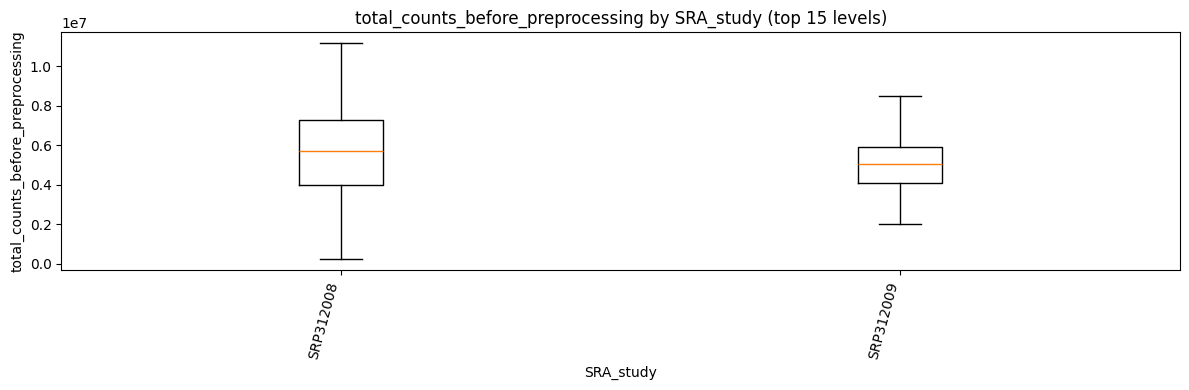

/mnt/data/thesis_project/notebooks/ipykernel_615122/3460499819.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


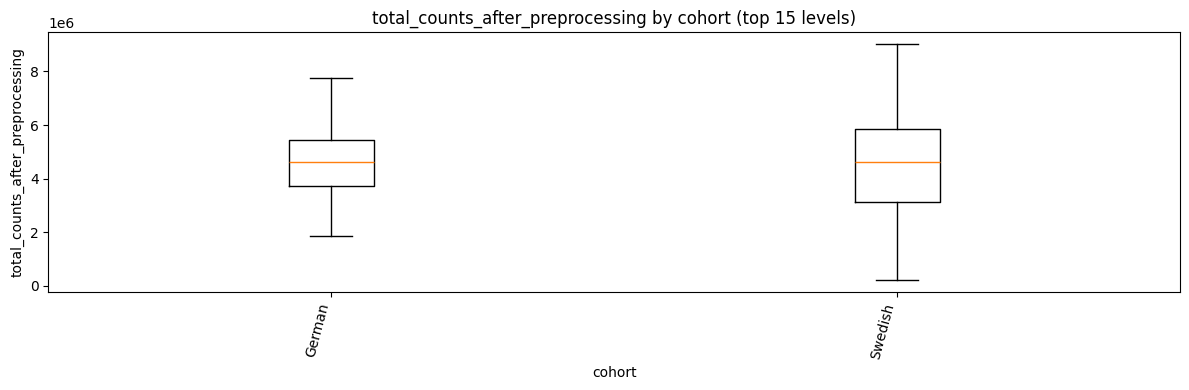

/mnt/data/thesis_project/notebooks/ipykernel_615122/3460499819.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


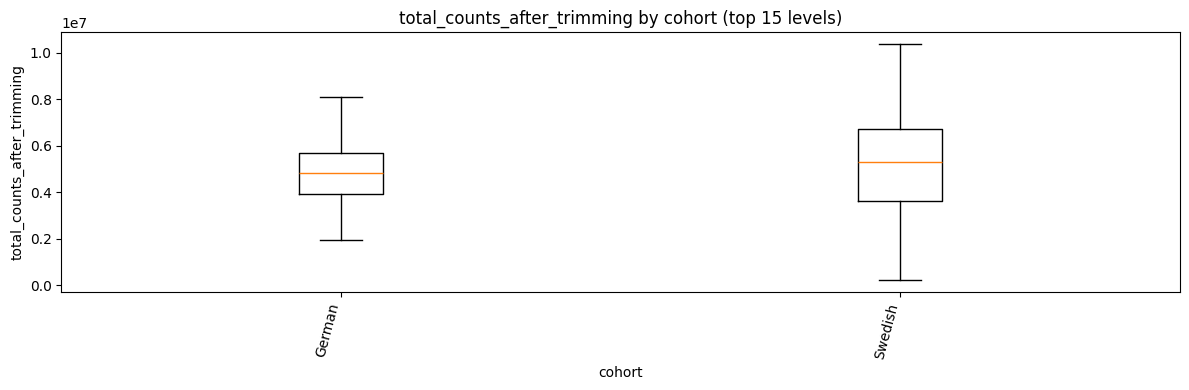

/mnt/data/thesis_project/notebooks/ipykernel_615122/3460499819.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


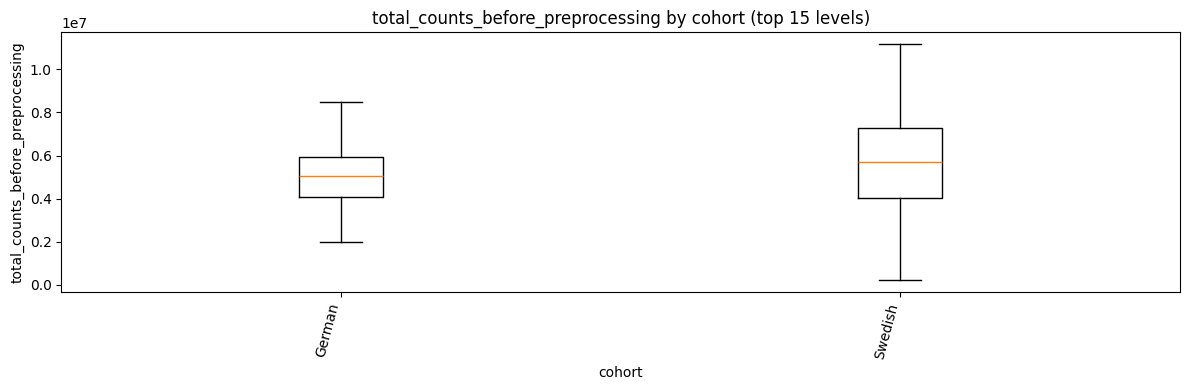

/mnt/data/thesis_project/notebooks/ipykernel_615122/3460499819.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


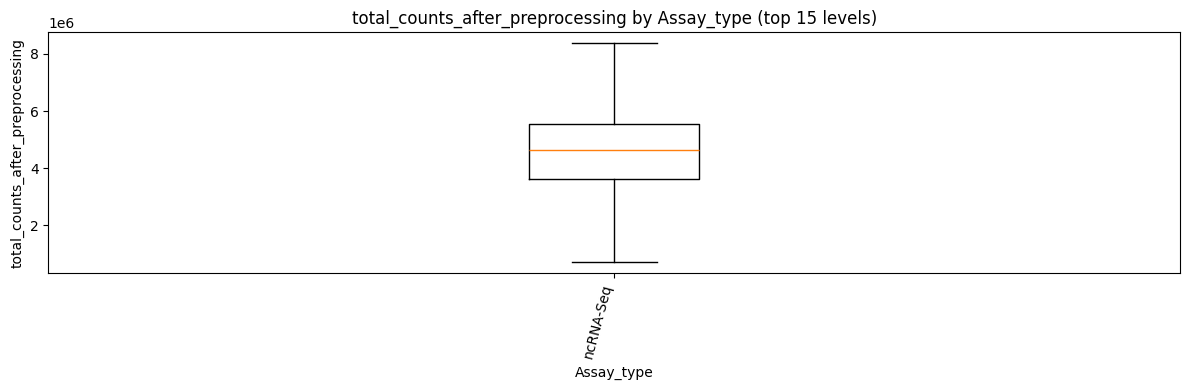

/mnt/data/thesis_project/notebooks/ipykernel_615122/3460499819.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


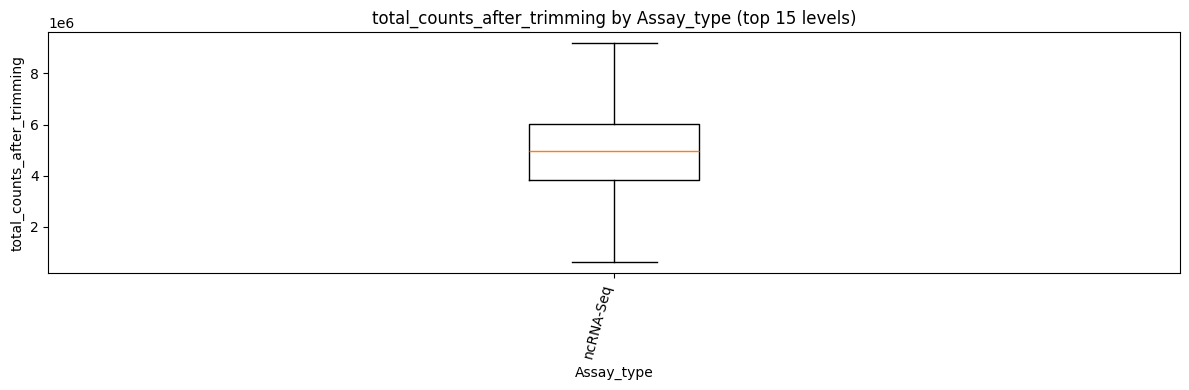

/mnt/data/thesis_project/notebooks/ipykernel_615122/3460499819.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


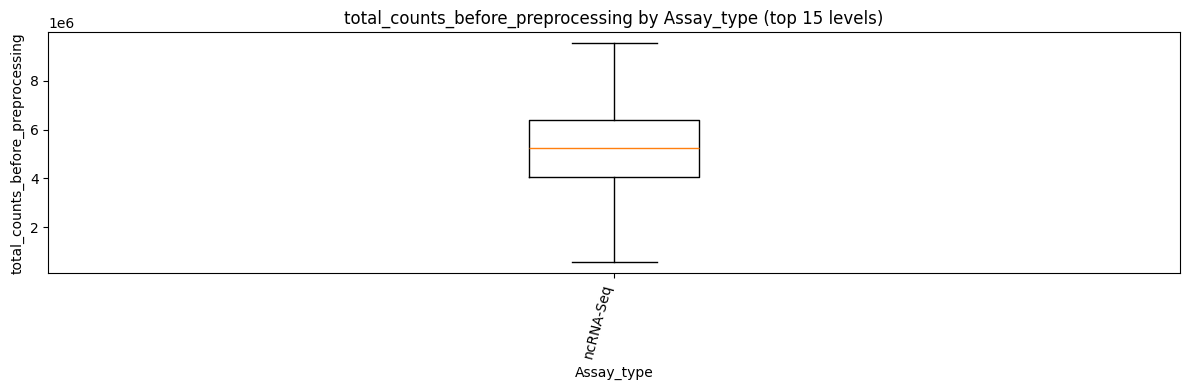

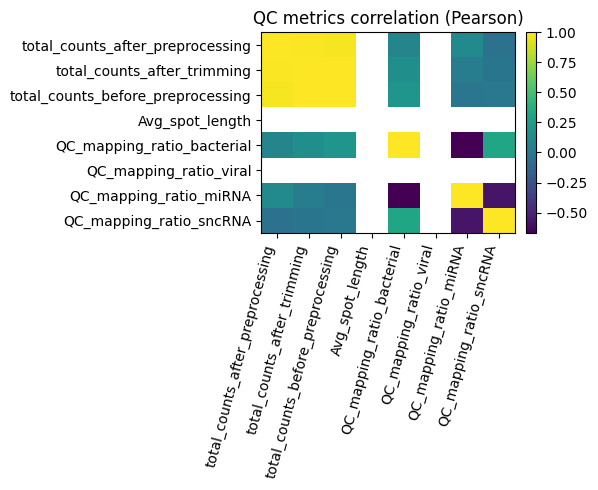

In [ ]:
# Batch-candidate audit + QC association plots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# ---- User-configurable lists ----
batch_candidates = [
    "cohort", "Center_name", "Sequencer", "Lab_library_preparation_kit",
    "Assay_type", "Sample_type", "Lab_library_layout", "Experiment", "SRA_study"
]
qc_metrics = [
    "total_counts_after_preprocessing",
    "total_counts_after_trimming",
    "total_counts_before_preprocessing",
    "Avg_spot_length",
    "QC_mapping_ratio_bacterial",
    "QC_mapping_ratio_viral",
    "QC_mapping_ratio_miRNA",
    "QC_mapping_ratio_sncRNA",
]

# Keep only columns that exist
batch_candidates = [c for c in batch_candidates if c in adata.obs.columns]
qc_metrics = [q for q in qc_metrics if q in adata.obs.columns]

# ---- 1) Summary table for candidates ----
def summarize_batch_candidates(adata, candidates):
    rows = []
    df = adata.obs.copy()
    for col in candidates:
        s = df[col].astype("category")
        vc = s.value_counts(dropna=False)
        rows.append({
            "column": col,
            "n_levels": int(vc.shape[0]),
            "min_count_per_level": int(vc.min()),
            "max_count_per_level": int(vc.max()),
            "median_count_per_level": float(vc.median())
        })
    return pd.DataFrame(rows).sort_values(
        ["n_levels", "min_count_per_level"], ascending=[True, False]
    )

summary = summarize_batch_candidates(adata, batch_candidates)
print("Batch candidate summary:")
display(summary)

# ---- 2) Kruskal–Wallis test: QC differences across levels ----
def kruskal_by_level(adata, group_col, qc_cols, min_n_per_group=3):
    df = adata.obs.copy()
    g = df[group_col].astype("category")
    out = []
    for q in qc_cols:
        # collect finite values per level
        groups = []
        for lvl in g.cat.categories:
            vals = pd.to_numeric(df.loc[g == lvl, q], errors="coerce").to_numpy()
            vals = vals[np.isfinite(vals)]
            if len(vals) > 0:
                groups.append(vals)

        # need at least 2 groups with enough samples
        eligible = [arr for arr in groups if len(arr) >= min_n_per_group]
        if len(eligible) < 2:
            stat, p = np.nan, np.nan
        else:
            all_vals = np.concatenate(eligible)
            # if all numbers across groups are identical, Kruskal is undefined
            if np.nanmin(all_vals) == np.nanmax(all_vals):
                stat, p = np.nan, 1.0  # or np.nan/np.nan; pick what you prefer
            else:
                stat, p = kruskal(*eligible)  # ranks are well-defined

        out.append({"column": group_col, "qc_metric": q,
                    "kruskal_stat": stat, "p_value": p})
    return pd.DataFrame(out)

frames = []
for col in summary["column"]:
    frames.append(kruskal_by_level(adata, col, qc_metrics))
kw_table = pd.concat(frames, ignore_index=True)

# Add -log10 p-value for readability
kw_table["neglog10_p"] = -np.log10(kw_table["p_value"].replace(0, np.nextafter(0, 1)))
print("Kruskal–Wallis table (QC differences across candidate levels):")
display(kw_table.sort_values(["neglog10_p"], ascending=False).head(20))

# ---- 3) Visualizations ----
def plot_counts_per_level(adata, group_col, top_n=None):
    """Bar chart of sample counts per level (balance check)."""
    s = adata.obs[group_col].astype("category")
    vc = s.value_counts().sort_values(ascending=False)
    if top_n is not None:
        vc = vc.head(top_n)
    plt.figure(figsize=(10, 4))
    plt.bar(vc.index.astype(str), vc.values)
    plt.xticks(rotation=75, ha="right")
    plt.title(f"Sample counts per level: {group_col}")
    plt.xlabel(group_col)
    plt.ylabel("n samples")
    plt.tight_layout()
    plt.show()

def boxplot_qc_by_level(adata, group_col, qc_col, top_n_levels=15):
    """Boxplot of a QC metric by candidate levels (technical shift check)."""
    df = adata.obs[[group_col, qc_col]].dropna().copy()
    df[group_col] = df[group_col].astype("category")
    # If too many levels, show top-N by size
    sizes = df[group_col].value_counts().head(top_n_levels).index
    df = df[df[group_col].isin(sizes)]
    groups = [df.loc[df[group_col] == lvl, qc_col].values for lvl in df[group_col].cat.categories if lvl in sizes]
    labels = [str(lvl) for lvl in df[group_col].cat.categories if lvl in sizes]

    plt.figure(figsize=(12, 4))
    plt.boxplot(groups, labels=labels, showfliers=False)
    plt.xticks(rotation=75, ha="right")
    plt.title(f"{qc_col} by {group_col} (top {top_n_levels} levels)")
    plt.xlabel(group_col)
    plt.ylabel(qc_col)
    plt.tight_layout()
    plt.show()

def qc_correlation_heatmap(adata, qc_cols):
    """Correlation heatmap among QC metrics (Pearson)."""
    df = adata.obs[qc_cols].copy().dropna()
    C = df.corr(method="pearson").values
    plt.figure(figsize=(6, 5))
    im = plt.imshow(C, aspect="auto")
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks(range(len(qc_cols)), qc_cols, rotation=75, ha="right")
    plt.yticks(range(len(qc_cols)), qc_cols)
    plt.title("QC metrics correlation (Pearson)")
    plt.tight_layout()
    plt.show()

# Example: visualize top-3 candidates by strongest QC separation (lowest p-values)
top_candidates = (kw_table
                  .groupby("column")["neglog10_p"]
                  .max()
                  .sort_values(ascending=False)
                  .index.tolist())

top_candidates = [c for c in top_candidates if c in batch_candidates][:3] or list(summary["column"].head(3))
print("Top candidates to visually inspect:", top_candidates)

# 3a) counts per level
for col in top_candidates:
    plot_counts_per_level(adata, col, top_n=20)

# 3b) QC-by-level boxplots for each candidate and each QC metric (limit to a few QC metrics to avoid too many plots)
qc_to_plot = qc_metrics[:3]  # change if you want more
for col in top_candidates:
    for q in qc_to_plot:
        boxplot_qc_by_level(adata, col, q, top_n_levels=15)

# 3c) QC correlation heatmap (overall picture)
qc_correlation_heatmap(adata, qc_metrics)
